In [ ]:
#!pip install split-folders

In [ ]:
#import splitfolders

In [ ]:
import numpy as np
import os

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import cv2

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cd /content/drive/MyDrive/
!pwd

/content


In [ ]:
#!ls -ls /content/drive/MyDrive/Colab/TB_Data/train/Normal/*.jpg | tail -20

In [ ]:
#Function to convert jpg to png and single channel
from PIL import Image
import os


target_directory = '/content/drive/MyDrive/Colab/TB_Data/train/Normal/'
target = '.png'
ind = 0
for file in os.listdir(target_directory):
    filename, extension = os.path.splitext(file)
    try:
        if extension not in ['.py', target]:
            #print(target_directory+ filename + extension)
            im = Image.open(target_directory+ filename + extension)
            im = im.convert('L')
            im.save(target_directory+filename + target)
            os.remove(target_directory+ filename + extension)
            ind += 1
            if ind%100 == 0 :
              print('Number of images done =', ind)
    except OSError:
        print('Cannot convert %s' % file)
print('Number of images done =', ind)

In [ ]:

target_directory = '/content/drive/MyDrive/Colab/TB_Data/val/Tuberculosis/'
extension = '.png'
ind = 0
for file in os.listdir(target_directory):
    try:
      im = Image.open(target_directory + file)
      if len(np.array(img.shape)) == 3 :
        im = im.convert('L')
        im.save(target_directory + file)
        ind += 1
        if ind%100 == 0 :
          print('Number of images done =', ind)
    except OSError:
        print('Cannot convert %s' % file)
print('Number of images done =', ind)

Number of images done = 100
Number of images done = 200
Number of images done = 300
Number of images done = 400
Number of images done = 500
Number of images done = 600
Number of images done = 700
Number of images done = 700


In [ ]:
# input_folder = '/content/drive/MyDrive/Colab/TB_Data/Normal'
# output_folder = './drive/MyDrive/Colab/TB_Data'
# splitfolders.ratio('/content/drive/MyDrive/Colab/TB_Data', output='/content/drive/MyDrive/Colab/TB_Data', seed=7, ratio=(.8, .2), group_prefix=None) # default values

In [ ]:
base_dir =  '/content/drive/MyDrive/Colab/TB_Data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_norm_dir = os.path.join(train_dir, 'Normal') 
train_tb_dir = os.path.join(train_dir, 'Tuberculosis')  # directory with our training dog pictures
validation_norm_dir = os.path.join(validation_dir, 'Normal')  # directory with our validation cat pictures
validation_tb_dir = os.path.join(validation_dir, 'Tuberculosis')  # directory with our validation dog pictures

In [ ]:
num_norm_tr = len(os.listdir(train_norm_dir))
num_tb_tr = len(os.listdir(train_tb_dir))

num_norm_val = len(os.listdir(validation_norm_dir))
num_tb_val = len(os.listdir(validation_tb_dir))

total_train = num_norm_tr + num_tb_tr
total_val = num_norm_val + num_tb_val


In [ ]:
print('total training Normal images:', num_norm_tr)
print('total training TB images:', num_tb_tr)

print('total validation Normal images:', num_norm_val)
print('total validation TB images:', num_tb_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training Normal images: 2800
total training TB images: 2800
total validation Normal images: 700
total validation TB images: 700
--
Total training images: 5600
Total validation images: 1400


In [ ]:
!ls /content/drive/MyDrive/Colab/TB_Data/train/Normal/ | head -5

Normal (1000).png
Normal (1002).png
Normal (1003).png
Normal (1005).png
Normal (1006).png


In [ ]:
IMAGE_RES = 256
import PIL.Image as Image

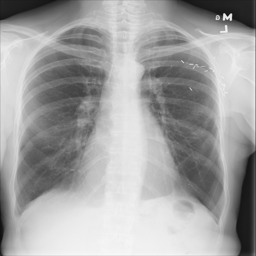

In [ ]:
normal = Image.open("/content/drive/MyDrive/Colab/TB_Data/train/Normal/Normal (1005).png").resize((IMAGE_RES, IMAGE_RES) )
normal

In [ ]:
normal = np.array(normal)/255.0
normal.shape

(256, 256)

In [ ]:
!ls /content/drive/MyDrive/Colab/TB_Data/train/Tuberculosis/ | tail -5

TB (996).png
TB (997).png
TB (998).png
TB (999).png
TB (9).png


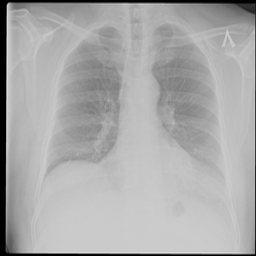

In [ ]:
tb = Image.open("/content/drive/MyDrive/Colab/TB_Data/train/Tuberculosis/TB (989).png").resize((IMAGE_RES, IMAGE_RES))
tb


In [ ]:
tb = np.array(tb)/255
tb.shape

(256, 256)

In [ ]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [ ]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')

Found 5600 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 1400 images belonging to 2 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen) 

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

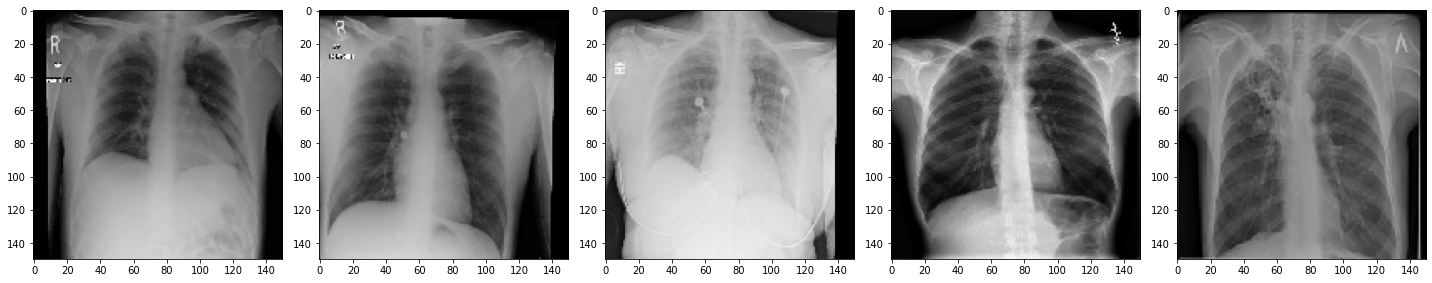

In [ ]:
plotImages(sample_training_images[:5])  # Plot images 0-4

In [ ]:
sample_training_images.shape

(100, 150, 150, 3)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
EPOCHS = 25
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
    )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
56/56 [==============================] - 1642s 29s/step - loss: 0.5808 - accuracy: 0.6647 - val_loss: 0.3510 - val_accuracy: 0.8579
Epoch 2/25
56/56 [==============================] - 75s 1s/step - loss: 0.2538 - accuracy: 0.8979 - val_loss: 0.2173 - val_accuracy: 0.9186
Epoch 3/25
56/56 [==============================] - 75s 1s/step - loss: 0.1771 - accuracy: 0.9327 - val_loss: 0.1957 - val_accuracy: 0.9086
Epoch 4/25
56/56 [==============================] - 75s 1s/step - loss: 0.1273 - accuracy: 0.9540 - val_loss: 0.1386 - val_accuracy: 0.9364
Epoch 5/25
56/56 [==============================] - 75s 1s/step - loss: 0.0851 - accuracy: 0.9687 - val_loss: 0.1024 - val_accuracy: 0.9636
Epoch 6/25
56/56 [==============================] - 75s 1s/step - loss: 0.0915 - accuracy: 0.9635 - val_loss: 0.1279 - val_accuracy: 0.9457
Epoch 7/25
56/56 [==============================] - 75s 1s/step - loss: 0.0719 - accuracy: 0.9759 - val_loss: 0.0941 - val_accuracy: 0.9636
Epoch 8/25
56/56 

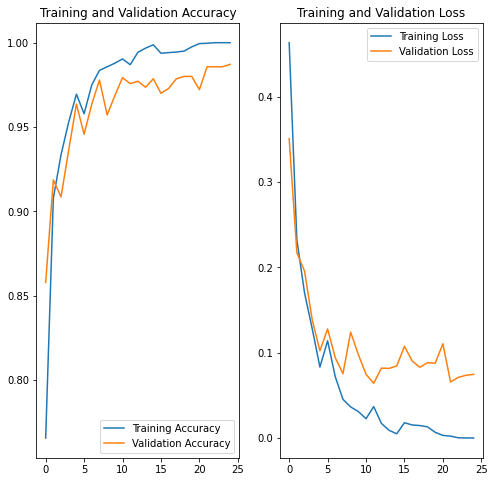

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/Colab/tb_model_cnn')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab/tb_model_cnn/assets


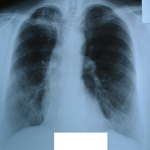

In [ ]:
tb = Image.open("/content/drive/MyDrive/Colab/TB_Data/val/Tuberculosis/TB (1).png").resize((IMG_SHAPE,IMG_SHAPE))
tb

In [ ]:
np.array(tb).reshape(-1,150,150,3).shape

(1, 150, 150, 3)

In [ ]:
os.path.join(validation_tb_dir, "TB (1).png")

'/content/drive/MyDrive/Colab/TB_Data/val/Tuberculosis/TB (1).png'

In [ ]:
def predict_class(imgray):
  img=np.array(imgray)/255
  #print(img.shape)
  if len(img.shape) != 2 :
    print ("Image must be 2 dimensional grey image")
    return "Error"
  img = np.tile(img[:, :, None], [1, 1, 3])
  #print(img.shape)
  img = img.reshape(-1,150, 150, 3 )
  #print(img.shape)
  pred = np.argmax(model.predict(img))
  if pred == 1:
    return "Tuberculosis"
  else: 
    return "Normal"

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab/tb_model_cnn')

In [ ]:
imgray = Image.open(os.path.join(validation_tb_dir, "TB (1).png")).resize((IMG_SHAPE,IMG_SHAPE)) 
predict_class(imgray)

'Tuberculosis'

In [ ]:
imgray = Image.open(os.path.join(validation_norm_dir, "Normal (106).png")).resize((IMG_SHAPE,IMG_SHAPE)) 
predict_class(imgray)

'Normal'

In [ ]:
#validation for normal images 
tot = 0
norm = 0
tb =0
err = 0
for file in os.listdir(validation_norm_dir):
  imgray = Image.open(os.path.join(validation_norm_dir, file) ).resize((150,150))
  pred = predict_class(imgray)
  if pred == "Normal":
    norm += 1
  elif pred == "Tuberculosis":
    tb += 1
  elif pred == "Error" :
    err += 1
  tot += 1
print (tot, norm, tb , err)

700 669 31 0


In [ ]:
#validation for tb images 
tot = 0
norm = 0
tb =0
err = 0
for file in os.listdir(validation_tb_dir):
  imgray = Image.open(os.path.join(validation_tb_dir, file)).resize((150,150))
  pred = predict_class(imgray)
  if pred == "Normal":
    norm += 1
  elif pred == "Tuberculosis":
    tb += 1
  elif pred == "Error" :
    err += 1
  tot += 1
print (tot, norm, tb , err)

700 12 688 0


***